# Import and Read the Raw Data
## Import Libraries

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/antam-stock-market-by-kitto/ANTM.JK.csv


## Import and Read the Data

In [47]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', -1)

antam = pd.read_csv('../input/antam-stock-market-by-kitto/ANTM.JK.csv', parse_dates=True)
antam['Date'] = pd.to_datetime(antam['Date'])

antam

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
...,...,...,...,...,...,...,...
3806,2021-02-02,2600.000000,2630.000000,2420.000000,2420.000000,2420.000000,942434300.0
3807,2021-02-03,2390.000000,2520.000000,2290.000000,2330.000000,2330.000000,948031000.0


## Data Info and Description

In [48]:
pd.set_option('display.max_rows', None)

antam_desc = pd.DataFrame()
antam_desc['isna'] = antam.isna().sum()
antam_desc['isnull'] = antam.isnull().sum()
antam_desc['nunique'] = antam.nunique()

print(antam.info(verbose=True), '\n','-'*80,'\n','-'*80,'\n', antam_desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3808 non-null   datetime64[ns]
 1   Open       3807 non-null   float64       
 2   High       3807 non-null   float64       
 3   Low        3807 non-null   float64       
 4   Close      3807 non-null   float64       
 5   Adj Close  3807 non-null   float64       
 6   Volume     3807 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 208.4 KB
None 
 -------------------------------------------------------------------------------- 
 -------------------------------------------------------------------------------- 
            isna  isnull  nunique
Date       0     0       3808   
Open       1     1       655    
High       1     1       652    
Low        1     1       645    
Close      1     1       648    
Adj Close  1     1       1249   
Volume

## Fill NaN value

In [ ]:
antam['Open'] = antam['Open'].interpolate()
antam['Close'] = antam['Close'].interpolate()
antam['High'] = antam['High'].interpolate()
antam['Low'] = antam['Low'].interpolate()
antam['Adj Close'] = antam['Adj Close'].interpolate()
antam['Volume'] = antam['Volume'].interpolate()

antam.isna().sum()

In [54]:
antam.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000,3.808000e+03
mean,1207.842828,1230.680843,1185.558010,1207.050397,1047.391263,6.857830e+07
std,664.829702,679.582108,649.190880,665.149052,495.638023,1.307962e+08
min,290.000000,294.000000,285.000000,287.000000,280.434296,0.000000e+00
25%,768.578796,780.000000,751.779297,765.000000,713.299744,1.420916e+07
50%,957.573608,978.573059,945.000000,957.573608,901.907929,3.422545e+07
75%,1595.956055,1621.155273,1570.756714,1595.956055,1346.766205,7.306411e+07
max,4409.878418,4451.877441,4115.886719,4241.883301,3190.000000,2.186653e+09


# Data Visualization

Text(0.5, 1.0, 'Close Prices of ANTM.JK')

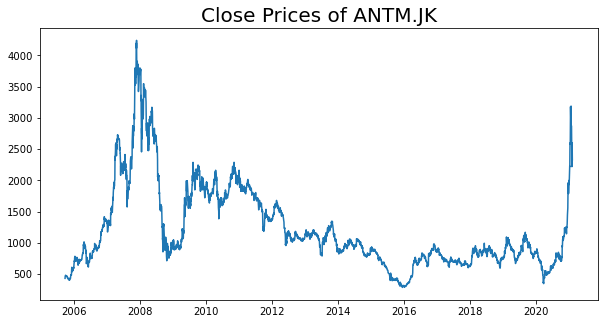

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(antam['Date'], antam['Close'])
ax.set_title('Close Prices of ANTM.JK', fontsize = 20)

# Predict

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

antam = antam.sort_index(ascending=True, axis=0)
antam_new = pd.DataFrame(index=range(0, len(antam)), columns=['Date', 'Close'])
for i in range(0, len(antam_data)):
    antam_new['Date'][i] = antam_data['Date'][i]
    antam_new['Close'][i] = antam_data['Close'][i]
               
antam_new.index = antam_new.Date
antam_new.drop('Date', axis=1, inplace=True)
               
dataset = antam_new.values

NameError: name 'antam_data' is not defined

## Split Data into Train and Test Sets

In [ ]:
antam.count()

In [ ]:
train_lstm = dataset[0:3000, :]
test_lstm = dataset[3000:, :]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60, len(train_lstm)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(x_train, y_train, epochs=250, batch_size=36, verbose=2)

In [ ]:
input_lstm = antam_new[len(antam_new) - len(valid) - 60:].values
input_lstm = input_lstm.reshape(-1, 1)
input_lstm = scaler.transform(input_lstm)

X_test = []
for i in range(60, input_lstm.shape[0]):
    X_test.append(input_lstm[i-60:i, 0])
X_test = np.array(X_test)
    
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = model_lstm.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms = np.sqrt(np.mean(np.power((valid - closing_price), 2)))
rms

In [ ]:
train = antam_new[:2000]
valid = antam_new[2000:]
valid['Predictions'] = closing_price
plt.figure(figsize=(18, 5))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# Additional

In [ ]:
antam['delta'] = antam['Date'] - antam['Date'].shift(1)
#antam[['Date', 'delta']].head()
antam['delta'].sum(), antam['Date'].count(), antam['delta'].nunique(), antam['delta'].value_counts()

Still don't know should to handle this missing date or not